# Homework 3

## Pair Programming Group Number: 54
## Members of Team: Parth Dave, Kevin Ly

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv("https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv")

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna().reset_index(drop=True)
df1.head(5)

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    r = 6371.0088
    pt1_rad = np.radians(pt1)
    pt2_rad = np.radians(pt2)

    return 2 * r * np.arcsin(np.sqrt(np.power(np.sin(0.5 * (pt1_rad[0] - pt2_rad[0])), 2) + np.cos(pt1_rad[0]) * np.cos(pt2_rad[0]) * np.power(np.sin(0.5 * (pt1_rad[1] - pt2_rad[1])), 2)))

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.244772513569124

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
df2 = df1.copy()
df2['distance_to_toorak'] = haversine_distance([df2['Lattitude'], df2['Longtitude']], toorak_pt)
df2.head(5)

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4.152012


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
df3 = df2.copy()
df3 = df3.join(pd.get_dummies(df3['Type'])).drop('Type', axis=1)
df3.head(5)

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,h,t,u
0,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4.261612,1,0,0
1,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4.621843,1,0,0
2,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4.374206,1,0,0
3,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4.780655,1,0,0
4,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4.152012,0,0,1


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method='pearson')

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,h,t,u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076668,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300236,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281684,0.121254,-0.028636,-0.115991


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
df_ones = pd.DataFrame(np.ones(len(df3)))
X = pd.concat([df_ones, df3.drop(['Suburb', 'Address', 'Price', 'Date', 'CouncilArea', 'Regionname'], axis=1)], axis=1)
x = X.values

In [9]:
# Step two, build the column vector y
y = df3['Price'].copy().values

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23], beta_hat) 

800558.1667037457

In [12]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.

df_test = pd.read_csv("https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv")

numericCols = df_test.columns.drop(["Suburb", 'Address', 'Price', "Date", 'CouncilArea', "Regionname", 'Type'])
df_test[numericCols] = df_test[numericCols].fillna(df_test[numericCols].mean().iloc[np.arange(len(numericCols))])
df_test.head(5)


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,Hume,-37.68907,144.91459,Northern Metropolitan
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,Melbourne,-37.79560,144.92779,Northern Metropolitan
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan


In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
df_test['distance_to_toorak'] = haversine_distance([df_test['Lattitude'], df_test['Longtitude']], toorak_pt)
df_test = df_test.join(pd.get_dummies(df_test['Type'])).drop('Type', axis=1)

In [15]:
# Step two, build the attribute matrix Xdot 
Xdot = pd.concat([df_ones[:1021], df_test.drop(['Suburb', 'Address', 'Price', 'Date', 'CouncilArea', 'Regionname'], axis=1)], axis=1)
Xdot.head(5)

,0,Rooms,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,h,t,u
0,1.0,3,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,-37.68907,144.91459,19.181567,1,0,0
1,1.0,3,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,-37.72224,144.85739,19.263068,1,0,0
2,1.0,3,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,-37.79560,144.92779,9.296810,1,0,0
3,1.0,3,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,-37.81614,145.05056,4.168250,0,1,0
4,1.0,4,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,-37.80437,145.01725,4.165735,1,0,0


In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = np.matmul(Xdot.values, beta_hat)

In [17]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
errors = np.abs(df_test['Price'].values - y_hat)

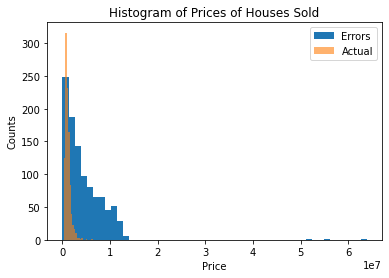

In [18]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent
plt.hist(errors, bins=50)
plt.hist(df_test['Price'], bins=20, alpha=0.6)
plt.title("Histogram of Prices of Houses Sold")
plt.xlabel("Price")
plt.ylabel("Counts")
plt.legend(['Errors', 'Actual'])
plt.show()

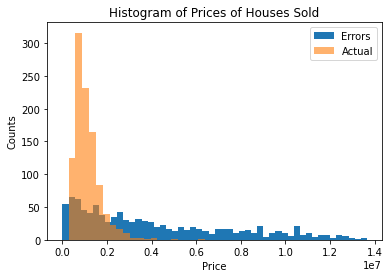

In [19]:
# Remove the 3 outliers to see the rest of the counts
errors.sort()
plt.hist(errors[:-3], bins=50)
plt.hist(df_test['Price'], bins=20, alpha=0.6)
plt.title("Histogram of Prices of Houses Sold")
plt.xlabel("Price")
plt.ylabel("Counts")
plt.legend(['Errors', 'Actual'])
plt.show()